In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from load_data import get_merged_data, get_skills_key
from skill_annotation import map_skills_to_green_type
joint_data = get_merged_data()
skills_key = get_skills_key()

Correlation between salary and green work percentage: 0.11736966030440356


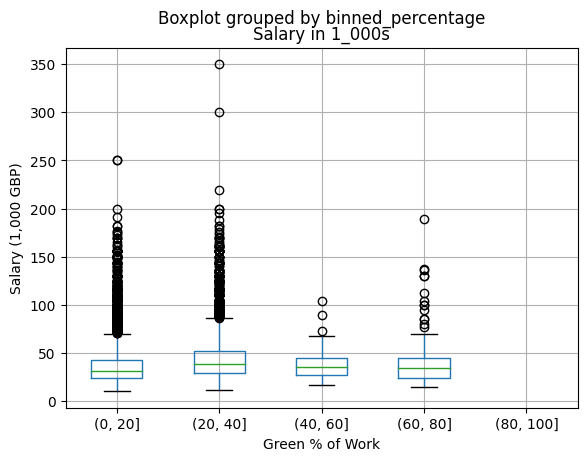

In [13]:
joint_data["binned_percentage"] = pd.cut(joint_data["percentage"], bins=[0, 20, 40, 60, 80, 100])
joint_data["Salary in 1_000s"] = joint_data["SALARY"] / 1_000
joint_data.boxplot("Salary in 1_000s", by="binned_percentage")
plt.xlabel("Green % of Work")
plt.ylabel("Salary (1,000 GBP)")

salary_nans = joint_data["SALARY"].isna()


corr = np.corrcoef(joint_data["SALARY"][~salary_nans], joint_data["percentage"][~salary_nans])[0, 1]
print(f"Correlation between salary and green work percentage: {corr}")

In [3]:
common_skills = skills_key[skills_key["occurrences"] > 1_000]
annotated_common_skills = map_skills_to_green_type(common_skills, joint_data, load_new=True)

print(annotated_common_skills.head())

Account Management
Accounting
Administrative Support
Agile Methodology
Amazon Web Services
Application Programming Interface (API)
Auditing
Automation
Booking (Sales)
Business Development
Business Requirements
Business To Business
C# (Programming Language)
Cascading Style Sheets (CSS)
Computer Science
Construction
Customer Relationship Management
Data Analysis
Data Entry
DevOps
Finance
Financial Services
Financial Statements
Housekeeping
HyperText Markup Language (HTML)
Information Privacy
Invoicing
Java (Programming Language)
JavaScript (Programming Language)
Key Performance Indicators (KPIs)
Machinery
Marketing
Mechanical Engineering
Mental Health
Microsoft Azure
New Product Development
Numeracy
Nursing
Operations Management
Personal Care
Pharmaceuticals
Presentation Skills
Process Improvement
Procurement
Project Management
Purchasing
Python (Programming Language)
Reconciliation
Restaurant Operation
Risk Analysis
Risk Management
SAP Applications
SQL (Programming Language)
Sales Manag

/home/karim/PycharmProjects/social-datathon-2023/skill_annotation.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skill_df[cat] = green_cat_to_skills.map(lambda x: x[i])
/home/karim/PycharmProjects/social-datathon-2023/skill_annotation.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skill_df[cat] = green_cat_to_skills.map(lambda x: x[i])
/home/karim/PycharmProjects/social-datathon-2023/skill_annotation.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/tmp/ipykernel_46309/1312721763.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annotated_common_skills.sort_values(by=skill_cols[2], ascending=False, inplace=True)


([<matplotlib.axis.YTick at 0x7fb306232ec0>,
 [Text(0, 0, 'Communications'),
  Text(0, 1, 'Customer Service'),
  Text(0, 2, 'Management'),
  Text(0, 3, 'Warehousing'),
  Text(0, 4, 'Problem Solving'),
  Text(0, 5, 'Agile Methodology'),
  Text(0, 6, 'Software Development'),
  Text(0, 7, 'Software Engineering'),
  Text(0, 8, 'Detail Oriented'),
  Text(0, 9, 'Sales'),
  Text(0, 10, 'JavaScript (Programming Language)'),
  Text(0, 11, 'JavaScript (Programming Language)'),
  Text(0, 12, 'C# (Programming Language)'),
  Text(0, 13, 'C# (Programming Language)'),
  Text(0, 14, 'Java (Programming Language)'),
  Text(0, 15, 'Java (Programming Language)'),
  Text(0, 16, 'SQL (Programming Language)'),
  Text(0, 17, 'SQL (Programming Language)'),
  Text(0, 18, 'Amazon Web Services'),
  Text(0, 19, 'Amazon Web Services')])

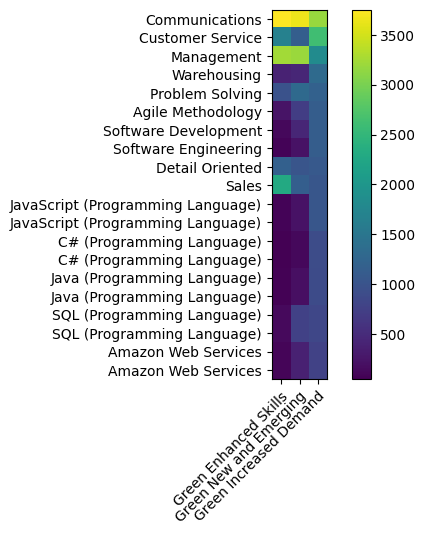

In [23]:
skill_range = 20
skill_cols = [
    "Green Enhanced Skills",
    "Green New and Emerging",
    "Green Increased Demand",
]

sort_by_skill = skill_cols[2]

annotated_common_skills.sort_values(by=sort_by_skill, ascending=False, inplace=True)

plt.imshow(annotated_common_skills.loc[:, skill_cols].values[:skill_range, :])

plt.colorbar()
plt.xticks(range(len(skill_cols)), skill_cols)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.yticks(range(skill_range), annotated_common_skills["skill_name"].iloc[:skill_range])

Text(0.5, 1.0, 'How correlated are green categories in our list of skills?')

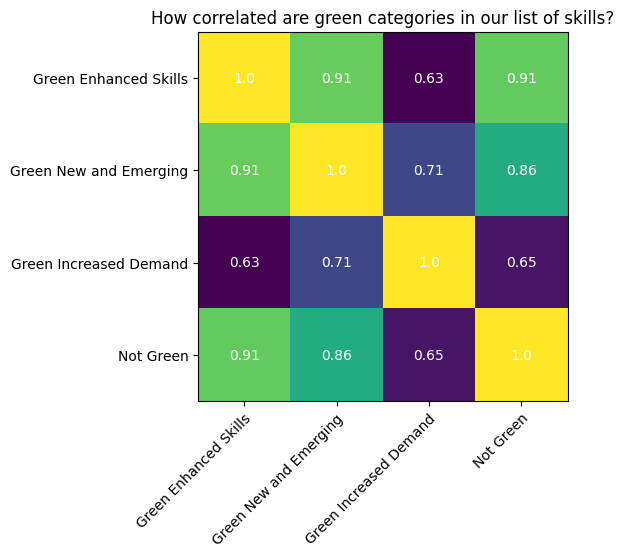

In [36]:
all_skill_related_cols = skill_cols + ["Not Green"]

correlation = np.corrcoef(annotated_common_skills.loc[:, all_skill_related_cols].values.T)

plt.imshow(correlation)
plt.xticks(range(len(all_skill_related_cols)), all_skill_related_cols)
plt.yticks(range(len(all_skill_related_cols)), all_skill_related_cols)
plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax = plt.gca()
for i in range(len(all_skill_related_cols)):
    for j in range(len(all_skill_related_cols)):
        text = ax.text(j, i, round(correlation[i, j], 2),
                       ha="center", va="center", color="w")

plt.title("How correlated are green categories in our list of skills?")